## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```


In [136]:
import numpy as np
import pandas as pd

In [137]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
def sp(df):
    sns.scatterplot(x='x1',y='x2',hue='group',data=df)
    plt.show()

Noise = 0.125


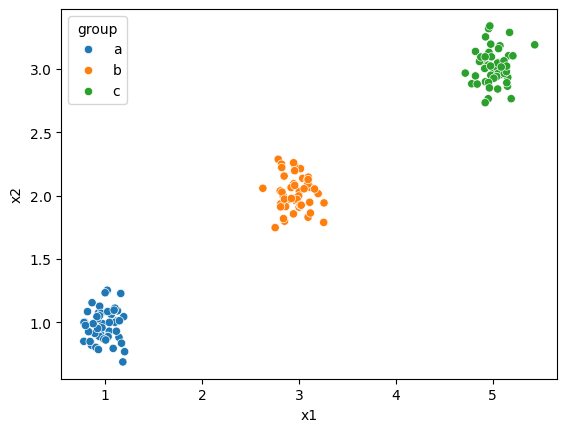

In [140]:
print("Noise = 0.125")
sp(df0_125)

Noise = 0.25


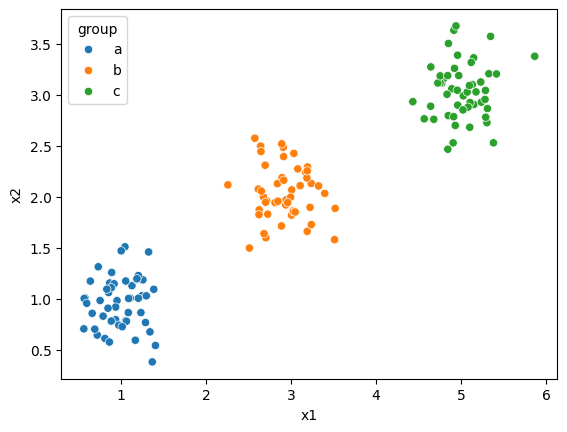

In [141]:
print("Noise = 0.25")
sp(df0_25)

Noise = 0.5


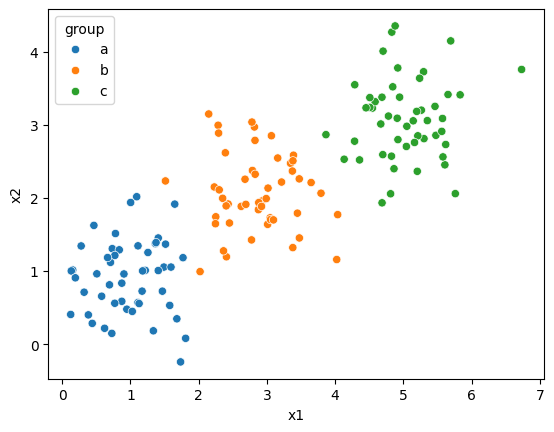

In [142]:
print("Noise = 0.5")
sp(df0_5)

Noise = 1.0


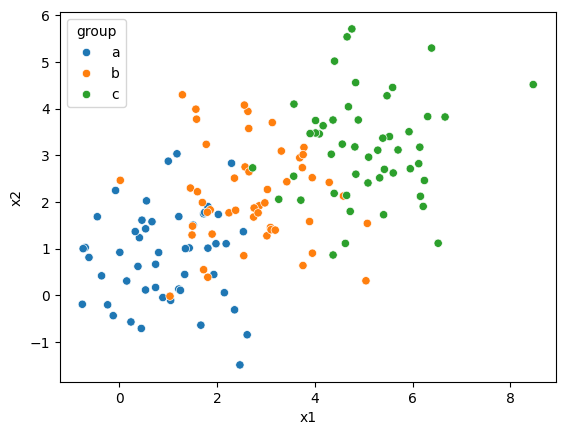

In [143]:
print("Noise = 1.0")
sp(df1_0)

Noise = 2.0


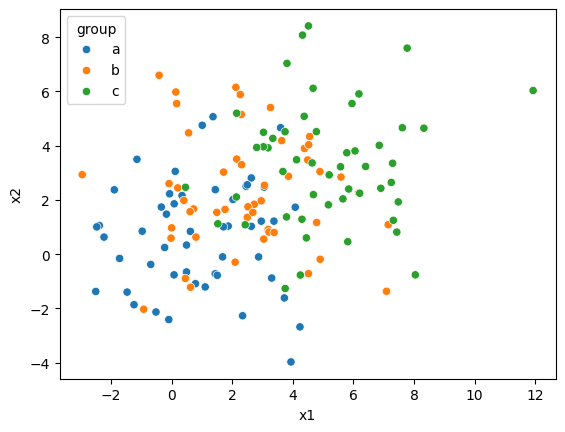

In [144]:
print("Noise = 2.0")
sp(df2_0)

In [145]:
# as noise goes up, the clusters become less visually distinct 

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)


In [146]:
from sklearn.cluster import KMeans

In [147]:

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

In [148]:
def scree(dfs, labels):
    for df, label in zip(dfs, labels): # I wanted all the plots in one graph with labels so I used zip() function found through deepseek 
        # prep each data frame
        X = df.drop(columns='group')
        X = X.apply(maxmin)
        k_bar = 10
        SSE = []
        # calculate SSE for each k for each data frame
        for k in range(k_bar): 
            model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
            model = model.fit(X) 
            SSE.append(model.inertia_) 
        # add scree plot for each data frame
        sns.lineplot(x=np.arange(1,k_bar+1), y=SSE, label = label)
    plt.show()

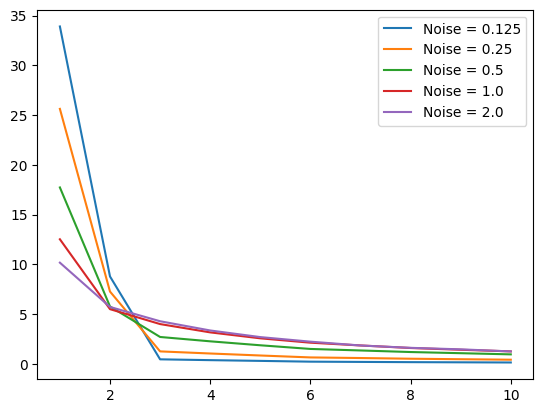

In [149]:
scree(dfs=[df0_125, df0_25, df0_5, df1_0, df2_0], labels=['Noise = 0.125', 'Noise = 0.25', 'Noise = 0.5', 'Noise = 1.0', 'Noise = 2.0'])

In [150]:
# as noise goes up, the elbow becomes less distinct and harder to determine the optimal k value 
# (the purple line is the most difficult to determine the optimal k value, while blue is fairly easy to find the 'elbow' point)

4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [151]:
# the elbow is the point where the SSE stops decreasing as quickly (i.e. the point where the curve starts to flatten out), meaning
# that we get diminishing returns in accuracy (specifically SSE) on adding more clusters past that optimal point
# with data with lower noise/clearer clusters, there is a sharp elbow point, while with data with higher noise, the elbow is less distinct
# this means that scree plots as a visual tool are more useful for data with clearer clusters, as it is easier to determine the optimal k value

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?


In [152]:
me = pd.read_csv("/Users/gracesaunders/Documents/GitHub/clustering/assignment/data/SIPRI Military Expenditure Database.csv")
me.head()

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
0,0,1988,Afghanistan,NaN,NaN,NaN,NaN
1,1,1989,Afghanistan,NaN,NaN,NaN,NaN
2,2,1990,Afghanistan,NaN,NaN,NaN,NaN
3,3,1991,Afghanistan,NaN,NaN,NaN,NaN
4,4,1992,Afghanistan,NaN,NaN,NaN,NaN


In [153]:
me = me.loc[(me['Year'] == 2020) & me.notna().all(axis=1)]
me.describe()
# I don't think it needs any more cleaning - all the variables (except name) are already numeric. 
# Honestly the values are lower than I expected, but I don't have any reason to think they're incorrect

,index,Year,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
count,148.000000,148.0,148.000000,148.000000,148.000000,148.000000
mean,2831.256757,2020.0,13153.747670,0.019619,0.061510,268.264494
std,1654.299355,0.0,68005.236120,0.015033,0.046207,430.434878
min,32.000000,2020.0,8.622460,0.000054,0.004896,0.580129
25%,1409.000000,2020.0,204.877177,0.010413,0.031352,20.553464
50%,2871.000000,2020.0,959.535443,0.015324,0.047402,81.506703
75%,4222.500000,2020.0,5289.998320,0.024327,0.084681,326.267753
max,5880.000000,2020.0,778397.200000,0.098470,0.303027,2520.398541


2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?


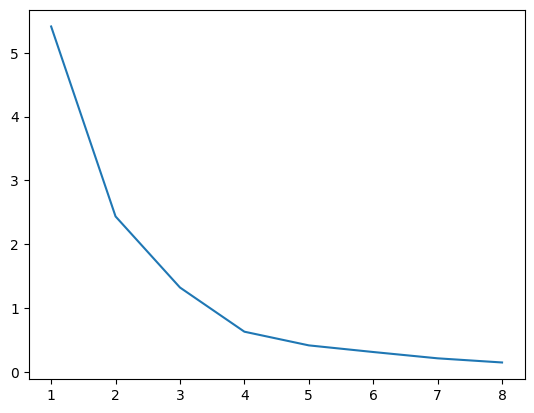

In [154]:
X = me[['Spending (2020 USD)', 'Spending per Capita']]
X = X.apply(maxmin)
k_bar = 8
SSE = []

# calculate SSE for each k 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0).fit(X) 
    SSE.append(model.inertia_) 
# add scree plot for each data frame
sns.lineplot(x=np.arange(1,k_bar+1), y=SSE)
plt.show()

<Axes: title={'center': 'k=4'}, xlabel='Spending (2020 USD)', ylabel='Spending per Capita'>

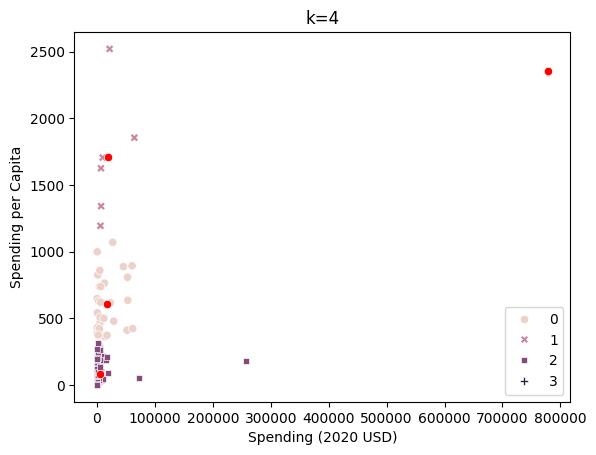

In [155]:
# the scree plot seems to have multiple "elbows," at 2 and 4 (and even a slight corner at 3), 
# but i'll choose 4 as the optimal k because two groups doesn't seem like it would have enough explanatory power
# and with k's higher than 4 the decrease in SSE is minimal
model = KMeans(n_clusters=4,random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
me['g_hat'] = model.predict(X) # Predict values

min_x1 = min(me.loc[:,'Spending (2020 USD)']) # values for rescaling
max_x1 = max(me.loc[:,'Spending (2020 USD)'])
min_x2 = min(me.loc[:,'Spending per Capita'])
max_x2 = max(me.loc[:,'Spending per Capita'])

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=me,x='Spending (2020 USD)',y='Spending per Capita',
                            hue='g_hat',style='g_hat').set_title('k=4')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='red')

In [156]:
# at first I thought the scatterplot didn't look as good as I'd like it to, 
# but when I looked at the plot without the centroids I could see that there is one centroid that is only 
# associated with one outlier (presumably the US) which was hiding behind the dot for the centroid, so I think it's ok.

print(me.groupby('g_hat')[['Spending (2020 USD)', 'Spending per Capita']].describe())

      Spending (2020 USD)                                              \
                    count           mean           std            min   
g_hat                                                                   
0                    30.0   17077.591354  20583.053357     405.790494   
1                     6.0   19443.362047  22861.507114    6095.708713   
2                   111.0    4859.185065  25405.739131       8.622460   
3                     1.0  778397.200000           NaN  778397.200000   

                                                                   \
                 25%            50%            75%            max   
g_hat                                                               
0        2294.039665    5857.060906   26296.001003   61712.537169   
1        7023.251766    8624.225729   18857.070183   64558.400000   
2         130.010211     382.464677    2297.032353  257973.429834   
3      778397.200000  778397.200000  778397.200000  778397.200000   

    

In [157]:
# from the description table we can also tell that the last cluster (highest spending) has only 1 member (I wonder who that could be) 
# the vast majority of countries belong to one cluster, which has the lowest mean by far for spending in 2020 USD and spending per capita
clustered = me.groupby('g_hat')['Country'].agg(list)
for i in range(len(clustered)):
    print(clustered[i])

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Italy', 'Japan', 'Korea, South', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'New Zealand', 'Poland', 'Portugal', 'Russia', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom']
['Israel', 'Kuwait', 'Norway', 'Oman', 'Saudi Arabia', 'Singapore']
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, DR', 'Congo, Republic', 'Croatia', 'Czechia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti

In [158]:
# printing the country names by cluster confirms that the US is in a cluster by itself, as we saw in the scatterplot

3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?


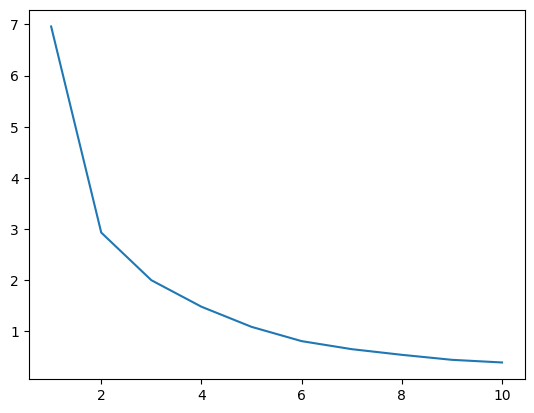

In [159]:
X = me[['Percent of Government Spending', 'Percent of GDP']]
X = X.apply(maxmin)
k_bar = 10
SSE = []

# calculate SSE for each k 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0).fit(X) 
    SSE.append(model.inertia_) 
# add scree plot for each data frame
sns.lineplot(x=np.arange(1,k_bar+1), y=SSE)
plt.show()

<Axes: title={'center': 'k=8'}, xlabel='Percent of Government Spending', ylabel='Percent of GDP'>

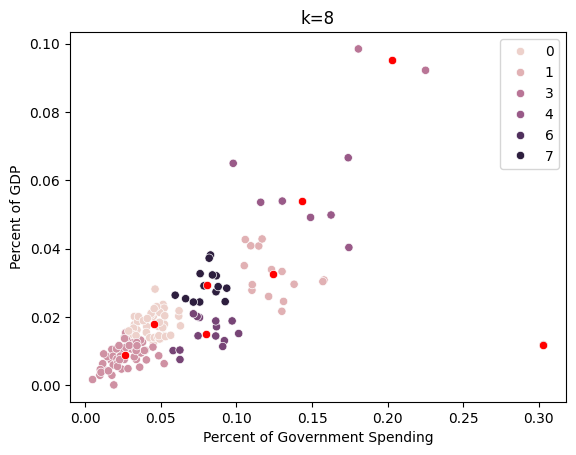

In [160]:
# this one doesn't have a very clear elbow either, so I'm going to look at scatterplots for k=2, k=3, and k=6
min_x1 = min(me.loc[:,'Percent of Government Spending']) # values for rescaling
max_x1 = max(me.loc[:,'Percent of Government Spending'])
min_x2 = min(me.loc[:,'Percent of GDP'])
max_x2 = max(me.loc[:,'Percent of GDP'])

k=8 # after looking at the scatterplots for the k's i was planning on testing, I decided on k=8 
# because any lower values did not have a centroid for the outlier, 
# which I would say is significantly different than the other clusters on both axes
model = KMeans(n_clusters=k,random_state=0).fit(X) # Initialize a kmc model
me['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=me,x='Percent of Government Spending',y='Percent of GDP',
                                hue='g_hat').set_title(f'k='+str(k))
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='red')

In [161]:
print(me.groupby('g_hat')[['Percent of Government Spending', 'Percent of GDP']].describe())

      Percent of Government Spending                                          \
                               count      mean       std       min       25%   
g_hat                                                                          
0                               41.0  0.045366  0.008662  0.028769  0.040453   
1                               15.0  0.124148  0.016868  0.105186  0.110380   
2                               54.0  0.026368  0.010404  0.004896  0.018658   
3                                2.0  0.202852  0.031393  0.180654  0.191753   
4                                7.0  0.143451  0.029665  0.097882  0.123195   
5                               14.0  0.080030  0.013544  0.058122  0.072164   
6                                1.0  0.303027       NaN  0.303027  0.303027   
7                               14.0  0.080291  0.009738  0.059520  0.075802   

                                    Percent of GDP                      \
            50%       75%       max          

In [162]:
clustered = me.groupby('g_hat')['Country'].agg(list)
for i in range(len(clustered)):
    print(i)
    print(clustered[i])

0
['Afghanistan', 'Australia', 'Belize', 'Bulgaria', 'China', 'Croatia', 'Cyprus', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'France', 'Georgia', 'Greece', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary', 'Jamaica', 'Kyrgyz Republic', 'Latvia', 'Lesotho', 'Lithuania', 'Montenegro', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Poland', 'Portugal', 'Romania', 'Rwanda', 'Senegal', 'Serbia', 'Seychelles', 'Slovakia', 'Thailand', 'United Kingdom', 'Uruguay']
1
['Bahrain', 'Brunei', 'Chad', 'Colombia', 'Congo, Republic', 'Iran', 'Korea, South', 'Lebanon', 'Mali', 'Mauritania', 'Morocco', 'Myanmar', 'Russia', 'Singapore', 'Uganda']
2
['Albania', 'Argentina', 'Austria', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Cape Verde', 'Czechia', 'Denmark', 'Dominican Republic', 'Ethiopia', 'Finland', 'Gambia, The', 'Germany', 'Ghana', 'Guatemala', 'Haiti', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Liberia',

In [ ]:
# I was surprised that this time, the US wasn't one of the outliers - those were Oman, Saudi Arabia, and Belarus
# I think that this one is slightly more useful than the previous model, because when adjusted for these economic measures 
# like total government spending and GDP, we get a more scaled comparison of how different countries prioritize military spending
# whereas the first model is dividing countries more by relative size and economic power than military expenditure per se

4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 


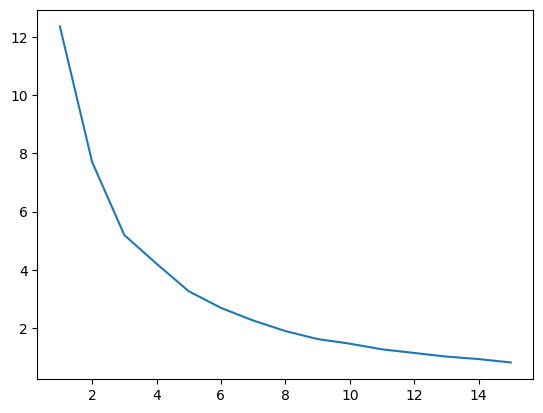

In [ ]:
X = me[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']]
X = X.apply(maxmin)
k_bar = 15
SSE = []

# calculate SSE for each k 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0).fit(X) 
    SSE.append(model.inertia_) 
# add scree plot for each data frame
sns.lineplot(x=np.arange(1,k_bar+1), y=SSE)
plt.show()

In [166]:
# this plot has even less of a clear elbow, but I don't know how to make a 4-D scatterplot to evaluate visually 
# so I'm choosing a k of 10 because at least it has an SSE below 2 
print(SSE[9])

k=10
model = KMeans(n_clusters=k,random_state=0).fit(X) # Initialize a kmc model
me['g_hat'] = model.predict(X) # Predict values
print(me.groupby('g_hat')[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']].describe())


0.385730995888404
      Spending (2020 USD)                                            \
                    count          mean            std          min   
g_hat                                                                 
0                    27.0  16813.595840   50577.752126    23.306688   
1                    10.0   7885.577712   14205.463736   198.530037   
2                    46.0   4701.941365    9794.914963    14.805016   
3                     2.0  35327.054356   41339.365456  6095.708713   
4                     4.0   5698.163972    5067.831157   633.960400   
5                    11.0   2360.907391    3659.597203    44.348098   
6                     1.0    707.418033            NaN   707.418033   
7                    14.0  63982.353116  206505.978283   163.926877   
8                     7.0  14197.172263   22181.711158   436.548223   
9                    26.0   3168.660545   10194.896592     8.622460   

                                                          

In [167]:
clustered = me.groupby('g_hat')['Country'].agg(list)
for i in range(len(clustered)):
    print(i)
    print(clustered[i])

0
['Australia', 'Belize', 'China', 'Croatia', 'Cyprus', 'Estonia', 'Fiji', 'France', 'Georgia', 'Greece', 'Guinea-Bissau', 'Hungary', 'Jamaica', 'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Mozambique', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'South Sudan', 'Thailand', 'United Kingdom', 'Uruguay']
1
['Chad', 'Congo, Republic', 'Iran', 'Korea, South', 'Lebanon', 'Mali', 'Mauritania', 'Myanmar', 'Singapore', 'Uganda']
2
['Afghanistan', 'Albania', 'Bolivia', 'Brazil', 'Bulgaria', 'Cameroon', 'Canada', 'Congo, DR', 'Czechia', 'Denmark', 'Dominican Republic', 'Egypt', 'El Salvador', 'Finland', 'Gambia, The', 'Germany', 'Guyana', 'Honduras', 'Indonesia', 'Italy', 'Kazakhstan', 'Kenya', 'Kosovo', 'Lesotho', 'Madagascar', 'Malawi', 'Malaysia', 'Montenegro', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia', 'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal', 'Seychelles', 'South Africa', 'Spain', 'Sweden', 'Tajikistan', 'Tanzania', 'Timor Leste', 'Z

5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

In [168]:
# (assuming this question is supposed to be asking about military spending trends)
# honestly I don't think this last model was very helpful, and left me with more questions than answers
# I'd be curious to see the codebook for this dataset, because I'd like more context for the data
# for example, what exactly counts here as military spending? does this include foreign military aid or only domestic expenditures? 
# or if we're talking about Sudan military spending, does this include the RSF which is technically a paramilitary group?
# and many more questions 
# overall I thought the 2nd model was the most informative, 
# but because the data lacked sharp 'elbows' or clear clusters like the example datasets, I think a more scientific/quantitative method
# for determining the optimal k (or potentially a different clustering method altogether) might have been more useful in this case


**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?